⭐ NIVEL 1

**Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.**

**Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.**

Antes de comenzar con la conexión a MySQL, primero instalaré e importaré las librerías necesarias para el manejo de los datos y la creación de gráficos para los ejercicios. Las librerías que utilizaré son:
- Pandas: para la manipulación y análisis de datos.
- Matplotlib: para la creación de gráficos.
- Seaborn: para generar visualizaciones más estilizadas y facilitar el análisis estadístico.


In [28]:
#pip install pandas
#pip install matplotlib
#pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez finalizado el proceso de instalación e importación de librerías necesarias para el manejo de los datos y la creación de gráficos, continué con la configuración de la conectividad entre Python y MySQL. El primer paso fue instalar e importar las librerías mysql-connector adecuado para permitir la comunicación entre ambos. 

El siguiente paso fue definir el método de conexión a MySQL. Para ello, utilicé mysql.connector para establecer una conexión con la base de datos MySQL llamada "transactions_s4" y, si la conexión es exitosa, realiza los siguientes pasos:
- Obtener una lista de las tablas 
- Iterar sobre las tablas para poder crear los DataFrame de pandas con los datos obtenidos

En el caso de que haya un error en la conexión, se muestra un mensaje indicando el problema. Finalmente, si la conexión sigue activa, se cierran tanto el cursor como la conexión para liberar los recursos.

In [29]:
#pip install mysql-connector-python
import mysql.connector
from mysql.connector import Error
try:
    connection = mysql.connector.connect(host='localhost',
                                        database='transactions_s4',
                                        username='root',
                                        password='root4')
    if connection.is_connected():
        cursor = connection.cursor() #Creación de un cursor para ejecutar consultas SQL
        cursor.execute(f"SHOW TABLES") # Se ejecuta la consulta "Show Tables" que devuelve las tablas de la base de datos
        tablas = [tabla[0] for tabla in cursor.fetchall()] # Se almacena la lista de nombres de las tablas en la variable tablas
       
        
        for tabla in tablas:  
            cursor.execute(f"SELECT * FROM {tabla}") # Ejecuta la consulta "Select * From {tabla}" para extraer los datos de c/tabla
            columnas = [columna[0] for columna in cursor.description] # Obtención de lista de nombres de las columnas de la tabla 
            globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)#Creación y nombramiento dinamico de pd.df
            print(f'df_{tabla}')

except Error as e:
    print("Error while connecting to MySQL", e) #Manejo de los posibles errores de sesión
finally:
    if connection.is_connected():
        cursor.close() # método para cerrar las conexiones abiertas después de que finalice su trabajo.
        connection.close() # método para cerrar las conexiones abiertas después de que finalice su trabajo.
        print("MySQL connection is closed")#Mensaje que el cursor y la conexión están cerradas  

df_companies
df_credit_cards
df_products
df_products_transactions
df_transactions
df_users
df_vistariesgoyseguridad
MySQL connection is closed


🫧Limpieza de datos

Una vez finalizada la conexión entre Python y MySQL, procedí a revisar los datos. Al utilizar el método df_name.info(), inspeccioné los DataFrames para verificar los tipos de datos de las columnas. Observé que algunos campos estaban clasificados como objetos cuando en realidad requerían una clasificación diferente. Posteriormente, realicé la conversión de los tipos de datos utilizando el método .astype() para las columnas adecuadas y el método to_datetime para los campos relacionados con fechas. 

In [30]:
#df_companies.info()
#df_credit_cards.info()
#df_products.info()
#df_products_transactions.info()
#df_transactions.info()
#df_users.info()
#df_vistariesgoyseguridad.info()

df_credit_cards ['expiring_date'] = pd.to_datetime(df_credit_cards['expiring_date'])
df_products = df_products.astype({'price': float, 'weight': float})
df_transactions = df_transactions.astype({'amount': float, 'declined': bool})
df_users['birth_date'] = pd.to_datetime(df_users['birth_date'])



🔴 EJERCICIO 1: 
Una variable numérica.

💡Explicación y diseño del gráfico

Para este análisis, seleccioné la variable numérica amount del DataFrame df_transactions. A continuación, opté por crear un histograma para visualizar la distribución de los datos. Posteriormente, personalicé el gráfico para mejorar su claridad y facilitar la interpretación de los resultados.

#Variable numerica_1 => Amount del df_transactions

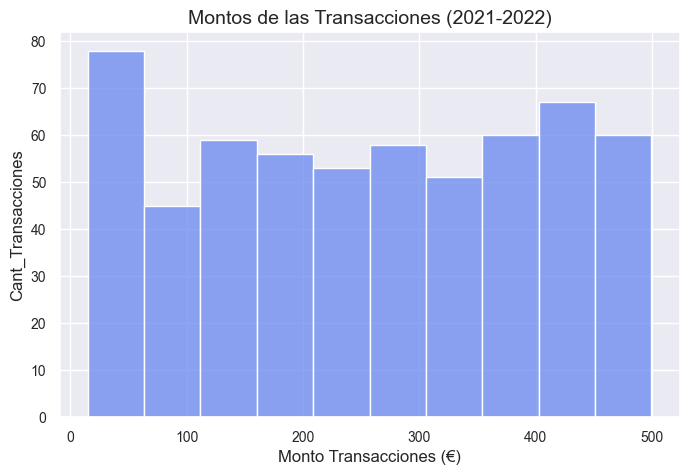

In [31]:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid', palette='coolwarm')
ax = sns.histplot(data=df_transactions, x="amount", bins=10)


plt.title('Montos de las Transacciones (2021-2022)', size=14)
plt.xlabel('Monto Transacciones (€)',size=12)
plt.ylabel('Cant_Transacciones', size=12)
plt.tick_params(axis='both', labelsize=10)

plt.show()



In [32]:
#Funcion que trae las primeras estadisticas por columna
df_transactions ['amount'].describe()

count    587.000000
mean     256.735520
std      144.133895
min       15.050000
25%      131.115000
50%      257.440000
75%      389.900000
max      499.230000
Name: amount, dtype: float64

📊 Análisis del gráfico

Para iniciar el análisis de la variable amount, primero utilicé el método .describe(), lo que me permitió obtener un resumen estadístico de la distribución de los datos, incluyendo medidas clave como la media, la mediana, el mínimo, el máximo y los percentiles.

El gráfico presenta la distribución de las transacciones realizadas entre marzo de 2021 y marzo de 2022. En el eje X se representan los montos de las transacciones en euros, mientras que en el eje Y se muestra la cantidad de las transacciones.

Se observa que la mayor concentración de transacciones corresponde al rango comprendido entre €15,05 (mínimo) y aproximadamente €50, con una cantidad de 78 transacciones, lo que indica que la mayoría de las operaciones se realizaron dentro de esta franja de precios. En segundo lugar, se encuentra el intervalo €400 - €450, con una cantidad de alrededor de 66-67 transacciones, sugiriendo un grupo de operaciones de mayor valor. Por otro lado, la franja de €50 - €100 mostró la menor cantidad de transacciones, con aproximadamente 45 operaciones.

La distribución de los montos sugiere una distribución multimodal, específicamente bimodal, ya que se identifican al menos dos grupos con cantidades elevadas, lo que indica la presencia de dos patrones de comportamiento distintos.Este patrón podría reflejar la existencia de dos segmentos diferenciados dentro del mercado:
- Transacciones de menor o igual valor €50: puede estar asociadas a compras recurrentes o productos de menor costo, con alta frecuencia de ocurrencia.
- Transacciones de alto valor entre €400 a €450: podrían estar asociadas a la adquisición de productos premium, dirigidos a un público más selecto.

🔴 **EJERCICIO 2:** 
Dos variable numérica.

💡Explicación y diseño del gráfico

Para este ejercicio, elegí las variables "amount" (monto de las transacciones) y "productos por transacción" como variables numéricas. En el DataFrame df_transactions, la columna product_ids contenía los IDs de los productos vendidos en formato de string. Para contar los productos por transacción, creé una nueva columna utilizando el método .apply() junto con la función lambda() que contiene el calculo de la funcion len(), que se aplica sobre el resultado de dividir el sting por comas mediante .split(',').

Una vez realizada esta operación, verifiqué el DataFrame con la nueva columna para asegurarme de que el conteo de productos fuera correcto. Posteriormente, generé un gráfico de dispersión (swarmplot), donde el eje X muestra la cantidad de productos vendidos y el eje Y muestra el monto de la transacción. Finalmente, personalicé el gráfico para mejorar su presentación y facilitar la interpretación.

#Variable num_1= amount

#Variable num_2= product_por_transaction

In [33]:
df_transactions ['product_por_transation'] = df_transactions['product_ids'].apply(lambda x:len(str(x).split(','))) 

#print(df_transactions[['amount','product_por_transation']].head())

df_transactions.head ()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,product_por_transation
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,False,"71, 1, 19",92,81.9185,-12.5276,3
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,False,"47, 97, 43",170,-43.9695,-117.5250,3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,False,"47, 67, 31, 5",275,-81.2227,-129.0500,4
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,False,"89, 83, 79",265,-34.3593,-100.5560,3
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,False,"43, 31",92,33.7381,158.2980,2


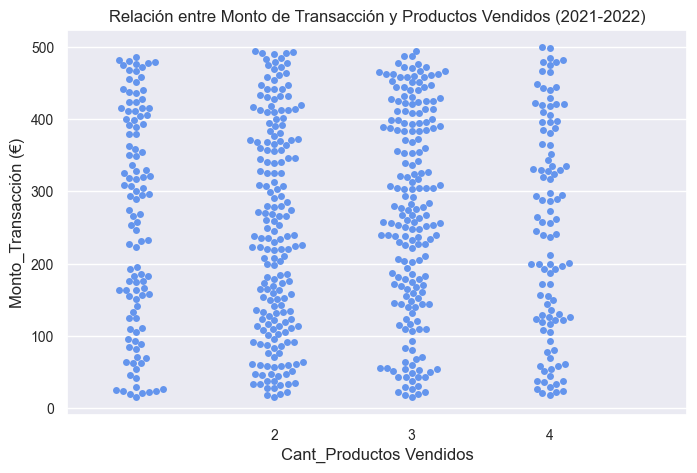

In [34]:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid', palette='coolwarm')
sns.swarmplot(x='product_por_transation', y='amount', data=df_transactions, color='cornflowerblue')

plt.title('Relación entre Monto de Transacción y Productos Vendidos (2021-2022)')
plt.xlabel('Cant_Productos Vendidos')
plt.ylabel('Monto_Transacción (€)')
plt.xticks([1, 2, 3, 4])
plt.tick_params(axis='both', labelsize=10)

plt.show()

📊 Análisis del gráfico 

En una primera instancia, podemos concluir que no existe una relación clara entre las variables seleccionadas. Normalmente, esperaríamos que a medida que aumenta la cantidad de productos por transacción, también aumente el monto total de la transacción. Sin embargo, los datos muestran que esto no se cumple, ya que hay transacciones con un solo producto cuyo monto es elevado, y transacciones con varios productos cuyos montos son bajos. 

Además, al analizar la distribución, observamos que algunas transacciones con hasta 4 productos tienen montos bajos, mientras que otras, con una cantidad similar de productos, tienen montos considerablemente más altos. Esto genera una distribución bastante homogénea en el gráfico, ya que las diferentes cantidades de productos (1, 2, 3, 4) abarcan un rango de montos que va desde €15,05 (mínimo) hasta €499.23 (máximo). 

Habría que revisar con más detalle las transacciones que se desvían de lo esperado, especialmente aquellas con un solo producto pero un monto elevado. Estas transacciones pueden ser casos atípicos, errores de entrada de datos o incluso transacciones que involucran productos de alto valor. Igualmente, las transacciones con varios productos pero montos bajos pueden implicar descuentos, promociones o productos de bajo precio, lo que también merece atención.

#

🔴 **EJERCICIO 3:**
Una variable categòrica.

💡Explicación y diseño del gráfico

Para este ejercicio, creé una nueva columna en df_companies llamada "cant_por_company". En esta columna, utilicé el método groupby para agrupar los datos por país y luego apliqué transform sobre company_id, usando la función count para obtener el número de empresas registradas en cada país.

Para facilitar la visualización, ordené los países de mayor a menor según la cantidad de empresas utilizando .sort_values() en la columna company_id. Esto permitió organizar los datos de manera clara y estructurada. Antes de continuar con la creación del gráfico, verifiqué que el DataFrame estuvieran correctos.

Con los datos listos, generé un gráfico de barras (Barplot) donde representé la cantidad de empresas en el eje X y los países en el eje Y, lo que facilitó la identificación de los países con más empresas registradas. Finalmente, personalicé el gráfico para mejorar su interpretación y hacerlo más visualmente atractivo.

#Variable categorica_1= Países del df_companies

In [35]:
#df_companies.head()

df_companies['cant_por_company'] = df_companies.groupby ("country")["company_id"].transform('count') 
df_companies= df_companies.sort_values(by='cant_por_company', ascending=False)

df_companies.head()


,company_id,company_name,phone,email,country,website,cant_por_company
30,b-2342,Fringilla Porttitor Incorporated,06 30 30 97 81,ultrices.a.auctor@protonmail.couk,Sweden,https://wikipedia.org/settings,11
31,b-2346,Ut Semper Foundation,01 60 36 33 06,consectetuer@google.ca,Sweden,https://ebay.com/settings,11
11,b-2266,Mus Aenean Eget Foundation,06 25 15 52 43,mi.duis@hotmail.net,Sweden,https://instagram.com/group/9,11
10,b-2262,Gravida Sagittis LLP,03 81 28 33 97,turpis.vitae@google.ca,Sweden,https://naver.com/site,11
53,b-2434,Tristique Neque Venenatis Institute,04 34 85 12 85,ullamcorper.magna@hotmail.ca,Sweden,https://ebay.com/sub,11


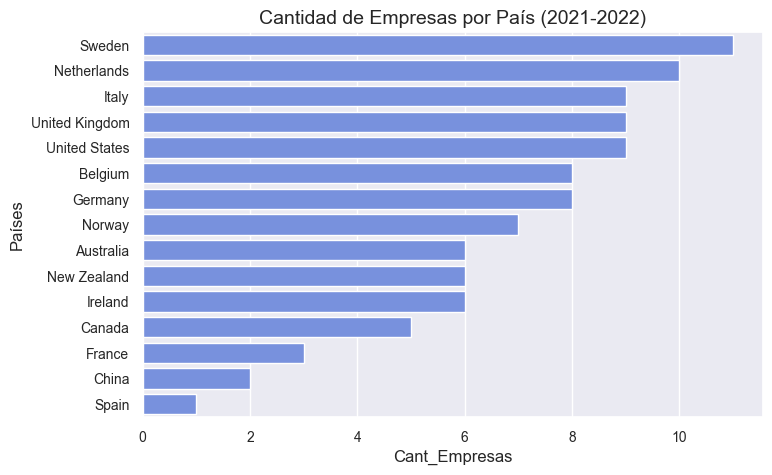

In [36]:
plt.figure(figsize=(8, 5))
sns.set_theme (style='darkgrid', palette='coolwarm')
sns.barplot(data=df_companies, x='cant_por_company', y='country')

# Personalizacion del gráfico
plt.title('Cantidad de Empresas por País (2021-2022)', fontsize=14)
plt.xlabel('Cant_Empresas', fontsize=12)
plt.ylabel('Países', fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# Mostrar el gráfico
plt.show()

📊 Análisis del gráfico 

El análisis del gráfico muestra que Suecia es el país con mayor cantidad de empresas en el dataset, con 11 registros, seguido por Países Bajos, que cuenta con un número de 10. En un nivel intermedio se encuentran Estados Unidos, Reino Unido, Italia, Alemania y Bélgica, con 9 empresas cada uno. Por otro lado, Francia, China y España son los países con menor representación, con menos de 4 empresas registradas.

Para mejorar este análisis, sería útil identificar los factores que hacen de Suecia y Países Bajos mercados atractivos, analizando los patrones comunes que explican su alta presencia en el dataset. Esto permitiría replicar estrategias exitosas en mercados similares. Asimismo, en los países con una representación intermedia, como Estados Unidos, Reino Unido, Italia, Alemania y Bélgica, se podrían fortalecer las relaciones comerciales y captar nuevos clientes para consolidar su crecimiento. Finalmente, en los países con menor cantidad de empresas, como Francia, China y España, sería importante analizar las posibles razones de su baja participación, ya sean barreras de entrada, falta de demanda o competencia local, para luego implementar medidas correctivas que permitan mejorar su presencia en el mercado.

🔴 EJERCICIO 4: 
Una variable categórica y una numérica.

💡Explicación y diseño del gráfico

Para comenzar con este ejercicio, seleccioné la variable categórica "country" del DataFrame df_companies y la variable numérica "amount" del DataFrame df_transactions. Para combinarlas en un único DataFrame, utilicé el método merge(), uniéndolos a través de su clave primaria. Como resultado, obtuve un nuevo DataFrame denominado df_transactions_companies.

Luego, realicé un agrupamiento de los datos utilizando el método groupby() sobre la columna "country", aplicando la función .sum() a la variable "amount" para calcular el total de montos por país.Luego ordené los datos en función del monto total por país utilizando sort_values(), lo que facilita la interpretación de la información al visualizar los países de mayor a menor monto acumulado.  Para garantizar que el DataFrame estuviera bien estructurado para el análisis posterior, utilicé el método reset_index() y generé un nuevo DataFrame llamado df_transactions_companies_group.

Con los datos ya preparados y verificados, seleccioné un gráfico de barras (Barplot) para representar la distribución de los montos por país. Finalmente, personalicé el gráfico para mejorar interpretación.

#Variable categorica =>  Paises de df_companies

#Variable numerica => amount de df_transactions

In [37]:
df_transactions_companies= df_transactions.merge(df_companies, left_on='business_id', right_on='company_id', how='outer') 
df_transactions_companies_group= df_transactions_companies.groupby ("country") ["amount"].sum().sort_values(ascending=False).reset_index()

df_transactions_companies_group.head()

,country,amount
0,Germany,28815.98
1,United Kingdom,27073.17
2,Sweden,20588.59
3,Norway,17286.71
4,Ireland,17193.12


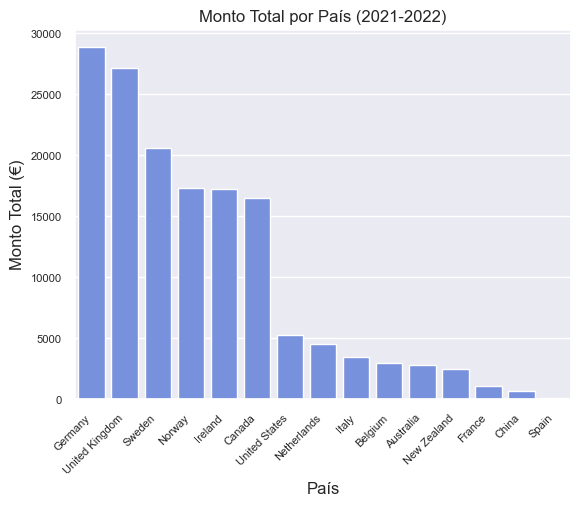

In [38]:
sns.set_theme (style='darkgrid', palette='coolwarm')
sns.barplot(data=df_transactions_companies_group,x="country", y="amount")

plt.title("Monto Total por País (2021-2022)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("País", fontsize=12)
plt.ylabel("Monto Total (€)", fontsize=12)
plt.tick_params(axis='both', labelsize=8)

plt.show()



📊 Análisis del gráfico 

El presente gráfico muestra el monto total de las transacciones, incluyendo tanto las aprobadas como las rechazadas, en el período de marzo 2021 a marzo 2022. Se observa que Alemania y Reino Unido registran los valores más altos, superando los 25.000 euros, lo que indica una alta actividad transaccional en estos países. En contraste, China y España presentan los montos más bajos, con España mostrando el desempeño más reducido, con un total que no supera los 110 euros.

Es importante destacar que estos valores representan el total de transacciones sin distinguir entre aprobadas y rechazadas, lo que puede afectar la interpretación de los datos. Para obtener una visión más precisa, se recomienda separar las transacciones aprobadas de las rechazadas y analizar su distribución por país. Esto permitiría identificar mercados con mayor volumen de ventas efectivas y detectar posibles problemas en la aprobación de transacciones en determinadas regiones. 

🔴 **EJERCICIO 5:** 
Dos variables categóricas.

💡Explicación y diseño del gráfico

Para realizar este análisis, seleccioné la variable categórica "country" y la variable categórica "declined" del DataFrame df_transactions_companies que fue creado en el ejercicio 4 del presente nivel.

Partiendo del df df_transactions_companies, lo que hice fue aplicar un filtro para seleccionar únicamente aquellas transacciones rechazadas (declined == True).

Para obtener la cantidad de transacciones rechazadas por país, utilicé el método .groupby() agrupando por "country" y luego apliqué .count() sobre la columna "declined" para calcular el total de rechazos por cada país. Luego ordené los datos de mayor a menor con el método .sort_values() utilizando la columna "declined" como criterio de ordenación. Para garantizar que el DataFrame estuviera bien estructurado para el análisis posterior, utilicé el método reset_index(). Luego verifique que dichos datos estén correctos. 

Con los datos ya estructurados, procedí a la creación del gráfico de barras (Barplot), donde en el eje X coloqué los países y en el eje Y la cantidad de transacciones declinadas. Finalmente, personalicé el gráfico para facilitar su interpretación.

#Variable categorica_1 =>  Paises de df_transactions_companies

#Variable categorica_2 =>  Declinadas (rechazadas) de df_transactions_companies

In [39]:
#df_transactions_companies.head()
df_transactions_companies_declined = df_transactions_companies[df_transactions_companies['declined'] == True]
df_transactions_companies_declined= df_transactions_companies_declined.groupby("country")['declined'].count().sort_values( ascending=False).reset_index()


df_transactions_companies_declined.head()

,country,declined
0,Sweden,11
1,Italy,8
2,United States,8
3,Netherlands,8
4,Germany,7


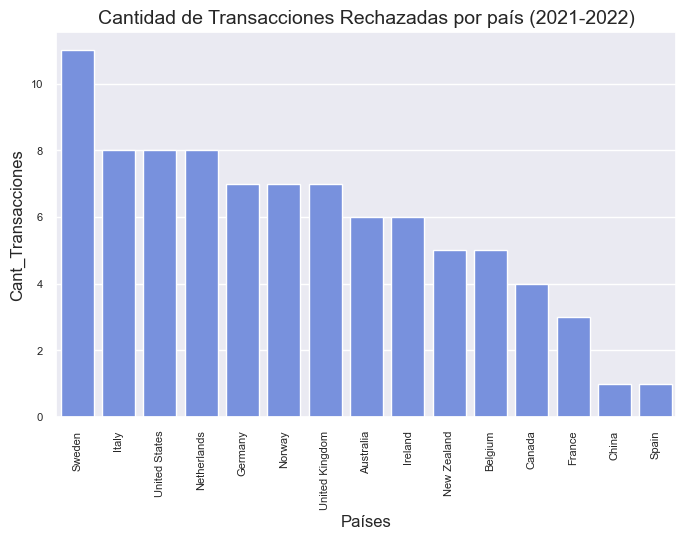

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_theme (style='darkgrid', palette='coolwarm')
sns.barplot(data= df_transactions_companies_declined, x="country", y="declined")

plt.title("Cantidad de Transacciones Rechazadas por país (2021-2022)", fontsize=14)
plt.xlabel("Países", fontsize=12)
plt.ylabel("Cant_Transacciones", fontsize=12)
plt.xticks(rotation=90)
plt.tick_params(axis='both', labelsize=8)

plt.show()

📊 Análisis del gráfico 

Este análisis sugiere que algunos países, como Suiza, Italia, Estados Unidos y Países Bajos, presentan una mayor cantidad de transacciones rechazadas en comparación con otros. Sería recomendable investigar si existen factores específicos que contribuyan a estas declinaciones, como verificaciones adicionales en los métodos de pago o patrones de fraude más frecuentes en estos países.

En el caso de China y España, habría que analizar si esta baja cantidad de transacciones rechazadas es realmente representativa. En análisis previos, se observó que estos países tuvieron un volumen de transacciones bajo en comparación con otros países. Esto podría indicar que las tasas de aprobación de transacciones en estos países son más altas o que existen factores externos que afectan la cantidad de declinaciones, como regulaciones bancarias, métodos de pago utilizados o políticas de fraude más estrictas.

🔴 **EJERCICIO 6:** 
Tres variables.

💡Explicación y diseño del gráfico

Para realizar este análisis, seleccioné la variable categórica "country", la variable categórica "declined" y la variable numerica cantidad de transacciones del DataFrame df_transactions_companies que fue creado en el ejercicio 4 del presente nivel.

El objetivo es analizar si hay países con un número de transacciones rechazadas superior al de las aprobadas.

El primer paso consistió en agregar una columna 'status' para identificar el estado de cada transacción (aprobada o rechazada), aplicando una condición con el método .apply(), donde asigné el valor "Aprobadas" y "No Aprobadas"(para las transacciones rechazadas).

A continuación, en un nuevo df llamado df_transactions_companies_status agrupé los datos por las variables país y status utilizando .groupby(). Apliqué la función .count() sobre el campo declined para contar la cantidad de transacciones aprobadas y no aprobadas por país. Luego ordené los datos de mayor a menor con el método sort_values() y los estructuré utilizando reset_index() para asegurarme de que todo estuviera organizado. Luego verifiqué los datos con una consulta sin límite de filas a modo de practica personal.

Finalmente, procedí a la creación de un gráfico de barras (barplot), donde el eje X representa los países y el eje Y muestra la cantidad de transacciones. Para diferenciar entre transacciones aprobadas y no aprobadas, utilicé el parámetro hue, que me permitió visualizar el estado de cada transacción en el gráfico. Personalicé el gráfico para mejorar su interpretación.


#Variable categorica_1 =>  Paises de df_transactions_companies

#Variable categorica_2 =>  Declinadas de df_transactions_companies (aprobadas y no aprobadas)

#Variable numerica_3 => Cant_transacciones de df_transactions_companies

In [41]:
df_transactions_companies['status'] = df_transactions_companies['declined'].apply(lambda x: 'No Aprobadas' if x else 'Aprobadas')
df_transactions_companies_status = df_transactions_companies.groupby(["country", "status"])["declined"].count().sort_values(ascending=False).reset_index()

pd.set_option('display.max_rows', None) 
print(df_transactions_companies_status)


           country        status  declined
0          Germany     Aprobadas       111
1   United Kingdom     Aprobadas        93
2           Sweden     Aprobadas        68
3           Norway     Aprobadas        61
4           Canada     Aprobadas        57
5          Ireland     Aprobadas        56
6           Sweden  No Aprobadas        11
7      Netherlands     Aprobadas        10
8    United States     Aprobadas         9
9            Italy     Aprobadas         9
10           Italy  No Aprobadas         8
11         Belgium     Aprobadas         8
12     Netherlands  No Aprobadas         8
13   United States  No Aprobadas         8
14          Norway  No Aprobadas         7
15         Germany  No Aprobadas         7
16  United Kingdom  No Aprobadas         7
17       Australia  No Aprobadas         6
18     New Zealand     Aprobadas         6
19       Australia     Aprobadas         6
20         Ireland  No Aprobadas         6
21         Belgium  No Aprobadas         5
22     New 

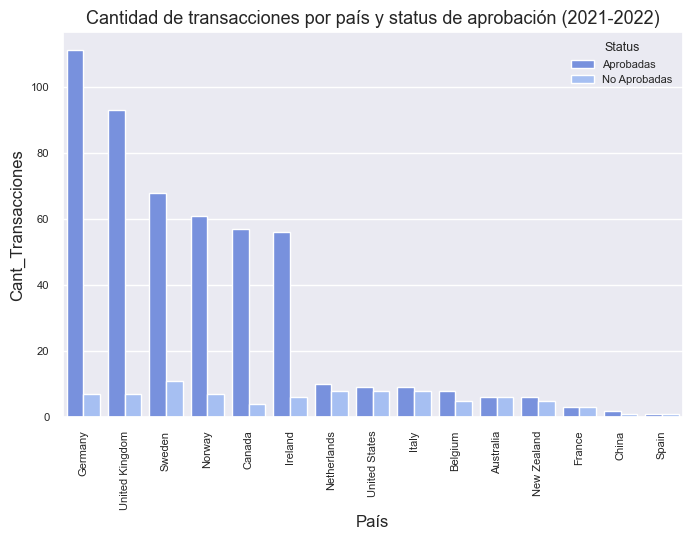

In [42]:
plt.figure(figsize=(8, 5))
sns.set_theme (style='darkgrid', palette='coolwarm')
sns.barplot(data=df_transactions_companies_status, x='country', y='declined', hue='status')

plt.title('Cantidad de transacciones por país y status de aprobación (2021-2022)', fontsize=13)
plt.ylabel('Cant_Transacciones', fontsize=12)
plt.xlabel('País', fontsize=12)
plt.xticks(rotation=90)
plt.tick_params(axis='both', labelsize=8)
plt.legend(title='Status', fontsize=8, title_fontsize='9', loc='upper right', frameon=False)


plt.show()

📊 Análisis del gráfico 

Este gráfico muestra la distribución de las transacciones realizadas por empresas ubicadas en diferentes países, clasificadas en transacciones aprobadas y no aprobadas durante el periodo de marzo de 2021 a marzo de 2022. 

Se observa que Australia y Francia presentan una cantidad equilibrada de transacciones aprobadas y no aprobadas, con 6 y 6 en Australia, y 3 y 3 en Francia. Sin embargo, este equilibrio podría no ser ideal, ya que generalmente se espera que las transacciones aprobadas superen a las no aprobadas. El hecho de que ambos países tengan un número similar de transacciones aprobadas y rechazadas puede sugerir que se están perdiendo oportunidades de negocio, lo que podría implicar que el proceso de validación de transacciones necesita ser optimizado para aumentar las aprobaciones. 

Por otro lado, España se encuentra en una situación más preocupante, con solo una transacción aprobada y una no aprobada, lo que podría señalar fallas importantes en el proceso de aprobación o una baja actividad en el mercado. 

Como recomendación, se debería investigar los procesos de aprobación en países como Australia y Francia, no solo para replicar las mejores prácticas, sino para evaluar si la tasa de rechazo podría reducirse sin comprometer la seguridad o calidad del producto. Además, sería útil revisar los procedimientos en España, identificar cuales serían los inconvenientes para luego aplicar medidas correctivas.

🔴 EJERCICIO 7: 
Graficar un Pairplot.

💡Explicación y diseño del gráfico

Para graficar un Pairplot, elegí las variables numéricas cantidad de transacciones del DataFrame df_transactions y users_id del DataFrame df_users, con el objetivo de relacionar a los usuarios con la cantidad de transacciones realizadas por dichos usuarios.

Quisiera aclarar que en este ejercicio, user_id se trata como una variable numérica para analizar su relación con otra variable cuantitativa, como la cantidad de transacciones. Se que se puede llegar a tomar como una variable categorica, pero en este ejercicio la tomo como una variable numérica.

Para realizar este análisis, lo primero que hice fue unificar el nombre de las columas donde se encuentran los numeros identificadores de los usuarios. Para ello, renombre la columna de "id" del df_users con el método .rename () para que cuando la una con el df_transactions no se repita la información. Luego seguí con la uniendo de los DataFrames df_transactions y df_users utilizando el método .merge(), vinculando ambos por su clave primaria.

A continuación, creé un nuevo df llamado df_transactions_users_aprobadas donde apliqué un filtro al df anterior para seleccionar solo las transacciones aprobadas, utilizando la columna declined (donde los valores False indican transacciones aprobadas). Posteriormente, calculé la cantidad de transacciones aprobados por usuario. Para ello, apliqué el método .groupby() sobre el campo user_id, y luego utilicé .count() sobre el campo user_id para contar el número de transacciones por cada usuario. Después, utilicé el método .reset_index(name='cant_transactions') para restablecer el índice y nombrar la columna con el total de transacciones de cada usuario como cant_transactions.

Una vez estructurados los datos, los verifiqué para asegurarme de que estuvieran correctos antes de proceder con la visualización. Dicha verificacion la hice con las ultimas 5 filas del dataframe a modo de practica personal (método.tail).
Finalmente, realicé el gráfico Pairplot para explorar la relación entre los usuarios y la cantidad de transacciones realizadas. Personalicé el gráfico para mejorar su interpretación visual.

#Variable numerica_1 => ID (Cantidad de transacciones) del df_transactions

#Variable numerica_2 => User_id (como variable numerica) del df_users

#Objetivo => Cada usuario cuantas transacciones realizaon

In [43]:
df_users.rename(columns={'id': 'user_id'}, inplace=True)
df_transactions_users= df_transactions.merge(df_users,on='user_id', how='left') 
df_transactions_users_aprobadas = df_transactions_users[df_transactions_users['declined'] == False]
df_transactions_users_aprobadas  = df_transactions_users_aprobadas .groupby("user_id")["user_id"].count().reset_index(name='cant_transactions')

print(df_transactions_users_aprobadas.tail())

     user_id  cant_transactions
211      271                  2
212      272                 38
213      273                  2
214      274                  2
215      275                 24


In [44]:
df_transactions_users.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,product_por_transation,name,surname,phone,email,birth_date,country,city,postal_code,address
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,False,"71, 1, 19",92,81.9185,-12.5276,3,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,False,"47, 97, 43",170,-43.9695,-117.5250,3,William,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,False,"47, 67, 31, 5",275,-81.2227,-129.0500,4,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,False,"89, 83, 79",265,-34.3593,-100.5560,3,Chloe,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St."
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,False,"43, 31",92,33.7381,158.2980,2,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."


<Figure size 800x500 with 0 Axes>

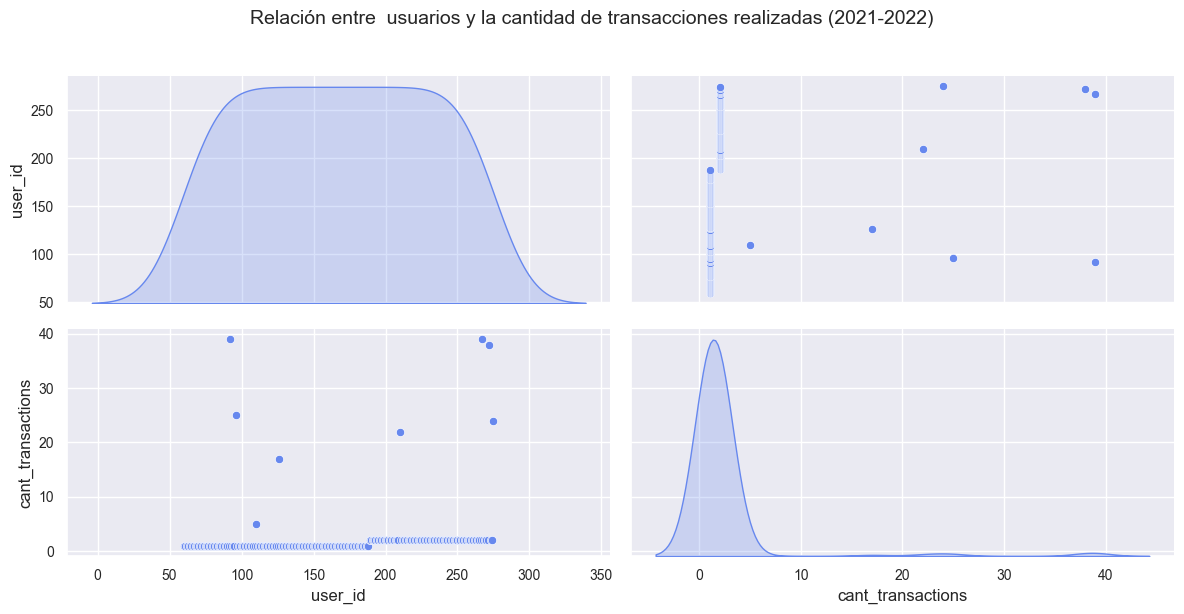

In [45]:
plt.figure(figsize=(8, 5))
sns.set_theme (style='darkgrid', palette='coolwarm')
ax=sns.pairplot(data=df_transactions_users_aprobadas, vars=['user_id', 'cant_transactions'], diag_kind='kde',height=3, aspect=2)

plt.suptitle('Relación entre  usuarios y la cantidad de transacciones realizadas (2021-2022)', size=14, y=1.02)
for x in ax.axes.flatten():
    x.set_xlabel(x.get_xlabel(), fontsize=12)
    x.set_ylabel(x.get_ylabel(), fontsize=12)
    x.tick_params(axis='both', labelsize=10)
plt.tight_layout()


# Mostrar gráficoplt.show()

📊 Análisis del gráfico 

Esta gráfica muestra la relación entre usuarios y la cantidad de transacciones realizadas por dichos usuarios durante el periodo de marzo de 2021 a marzo de 2022. Se observa que la mayoría de los usuarios se agrupan entre los ID de 60 y 275, lo que podría indicar una concentración de actividad en un grupo reducido de usuarios, aunque no contamos con información adicional para profundizar sobre esta distribución. En general, la mayoría de los usuarios realizaron entre 1 y 5 transacciones, mientras que solo unos pocos destacaron con más de 20 o más transacciones. Como recomendación, sería útil explorar posibles incentivos o estrategias de fidelización para motivar a los usuarios con pocas transacciones a realizar más compras, y también investigar más las características del grupo de usuarios más activos para entender qué los motiva y cómo se pueden replicar esas conductas en otros segmentos.

⭐⭐NIVEL 2

🔴 EJERCICIO 1: Correlación de todas las variables numéricas.

💡Explicación y diseño del gráfico

En este ejercicio, sólo tomé las variables numéricas que habían sido trabajadas en los ejercicios del nivel 1:

#Variable numerica_1=> Amount del df_transactions (Ejercicio 1)

#Variable numerica_2=> product_por_transaction (Ejercicio 2)

#Variable numerica_3 => Cant_transacciones aprobadas de df_transactions_users_aprobadas (Ejercicio  7)

#Variable numerica_4 => Users_id (Ejercicio 7)

Quisiera aclarar que en este ejercicio, user_id la trato como una variable numérica para analizar su relación con otras variables cuantitativas, como el monto de las transacciones y la cantidad de productos. Se que se puede llegar a tomar como una variable categorica, pero en este ejercicio la tomo como una variable numerica. 

Para comenzar con este proceso, quisiera explicar que df estoy utilizando como base:

- df_transactions: este DataFrame contiene la información de las transacciones, como el user_id, el monto de la transacción (amount), y la cantidad de productos por transacción (product_por_transation), entre otros variables categóricas. Este df fue trabajado en el nivel 1 ejercicio 2.

- df_transactions_users_aprobadas: este DataFrame contiene la cantidad de transacciones aprobadas por cada usuario. Tiene las columnas user_id y cantidad de transacciones por usuario. Este df fue trabajado en el nivel 1 ejercicio 7.

Teniendo en cuenta estos df lo primero que hice fue unir ambos df (df_transactions y df_transactions_users_aprobadas) con el metodo .merge () para que cada fila del df_transactions contenga la informacion completa sobre el comportamiento del usuario. 

Seguidamente, cree df_correlation_matrix donde lo primero que hice fue eliminar las columnas que no iba a utilizar para la correlacion con el método .drop() del df_transactions_union. Luego, realice el calculo de la matriz de correlacion. Es decir, al df df_variables_union le aplique el metodo.corr() y luego verifique que se haya creado correctamente.

Con los datos correctos, continue con la creacion del gráfico Heatmap y lo personalice para poder tener una mejor interpretacion de los datos.

#Variable numerica_1 => Amount del df_transactions (Ejercicio 1)

#Variable numerica_2 => product_por_transaction (Ejercicio 2)

#Variable numerica_3 => Cant_transacciones de df_transactions_users_aprobadas (Ejercicio 7)

#Variable numerica_4 => User_id (Ejercicio 7)

In [46]:
df_variables_union = df_transactions.merge(df_transactions_users_aprobadas, left_on='user_id', right_on='user_id', how='left')


df_variables_union.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,product_por_transation,cant_transactions
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,False,"71, 1, 19",92,81.9185,-12.5276,3,39
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,False,"47, 97, 43",170,-43.9695,-117.5250,3,1
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,False,"47, 67, 31, 5",275,-81.2227,-129.0500,4,24
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,False,"89, 83, 79",265,-34.3593,-100.5560,3,2
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,False,"43, 31",92,33.7381,158.2980,2,39


In [47]:
df_correlation_matrix = df_variables_union.drop(columns=['id','card_id',	'business_id','timestamp', 'declined','product_ids',		'lat',	'longitude']).corr()


df_correlation_matrix

,amount,user_id,product_por_transation,cant_transactions
amount,1.000000,-0.035354,0.007070,-0.021405
user_id,-0.035354,1.000000,0.037925,0.253921
product_por_transation,0.007070,0.037925,1.000000,-0.020954
cant_transactions,-0.021405,0.253921,-0.020954,1.000000


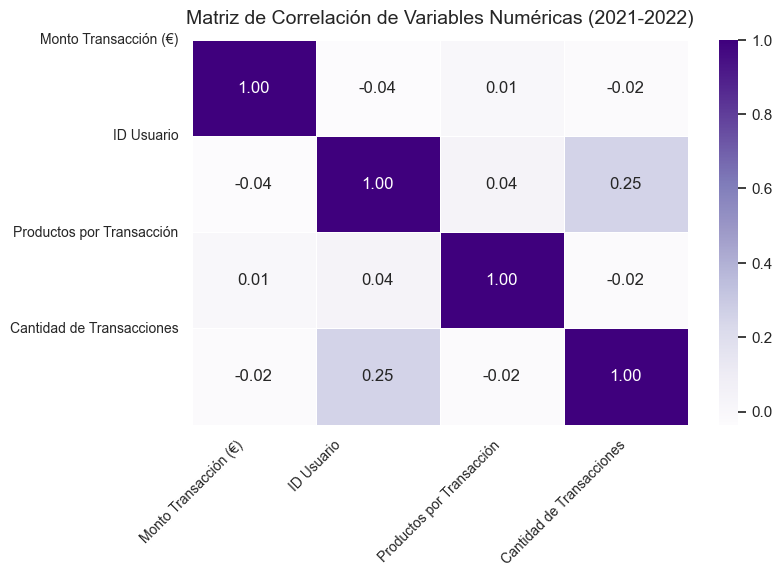

In [48]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_correlation_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)


plt.title("Matriz de Correlación de Variables Numéricas (2021-2022)", size=14, y=1.02)
new_labels = ["Monto Transacción (€)", "ID Usuario", "Productos por Transacción", "Cantidad de Transacciones"]
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)
plt.yticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.tick_params(axis='both', labelsize=10)


plt.show()

📊 Análisis del gráfico 

El gráfico de heatmap muestra la correlación entre las variables numéricas seleccionadas para el período de marzo 2021 a marzo 2022. 

El análisis de la matriz de correlación revela que las relaciones entre las variables amount, user_id, product_por_transation y cant_transactions son en su mayoría débiles.

La variable amount (monto de las transacciones) muestra una correlación muy baja y positiva con product_por_transation (0.01), lo que sugiere que la cantidad de productos en una transacción no influye significativamente en el monto total gastado. Asimismo, presenta una correlación débil y negativa con cant_transactions (-0.02), indicando que un mayor número de transacciones no está directamente relacionado con un mayor gasto total.

Por otro lado, user_id tiene una correlación negativa con amount (-0.04) y una correlación baja y positiva con product_por_transation (0.04). Esto sugiere que la identificación del usuario no es un factor clave en el monto de las transacciones ni en la cantidad de productos adquiridos por transacción. Sin embargo, user_id muestra su mayor correlación con cant_transactions (0.25), lo que indica que algunos usuarios tienden a realizar más transacciones que otros, aunque este vínculo sigue siendo moderado.

En cuanto a productos por transaccion, su relación con las demás variables es mínima, con correlaciones cercanas a cero, lo que sugiere que la cantidad de productos por transacción no guarda una relación significativa con el monto total de la transacción ni con la cantidad de transacciones realizadas por un usuario.

Finalmente, cant_transactions presenta una relación moderada con user_id (0.25), pero correlaciones débiles con las demás variables, lo que indica que la frecuencia de transacciones de un usuario no tiene un impacto directo en el monto total gastado ni en la cantidad de productos adquiridos por transacción.


🔴 EJERCICIO 2: Implementa un jointplot.

<Figure size 800x500 with 0 Axes>

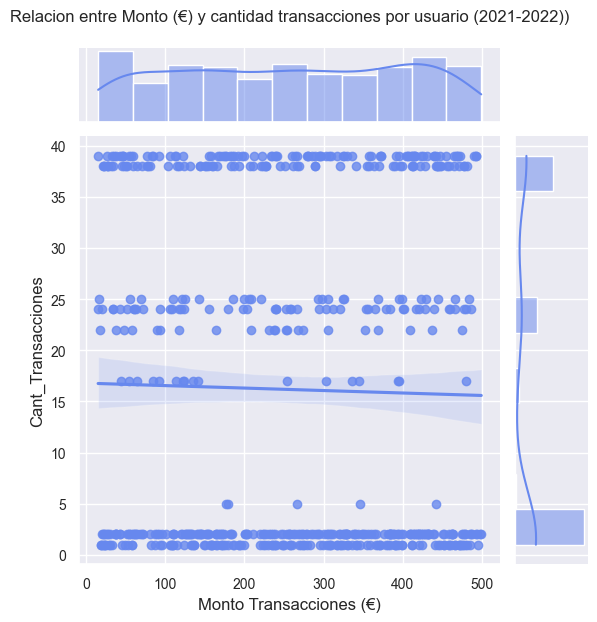

In [49]:
#Objetivo => analizar la relacion entre el monto de las transacciones (amount) y la cantidad de transacciones por usuario

plt.figure(figsize=(8, 5))
sns.jointplot(data=df_variables_union, x='amount', y='cant_transactions', kind='reg')

plt.title("Relacion entre Monto (€) y cantidad transacciones por usuario (2021-2022))", size=12, y=1.25)
plt.xlabel('Monto Transacciones (€)')
plt.ylabel('Cant_Transacciones')

plt.tick_params(axis='both', labelsize=10)

plt.show()


📊 Análisis del gráfico 

En este gráfico jointplot, que muestra la relación entre el monto total de las transacciones y la cantidad de transacciones realizadas por usuario durante el período de marzo 2021 a marzo 2022, podemos reafirmar lo observado en el análisis del Ejercicio 1, Nivel 2. Es decir, hay una baja correlacion entre estas variables. 

Un usuario que realiza muchas transacciones no necesariamente gasta más dinero en total. También un usuario puede tener un monto total alto con pocas transacciones. Esto sugiere que el valor de cada transacción puede variar significativamente.

La baja correlación podría deberse a diferencias en los patrones de compra, como usuarios que hacen muchas transacciones pequeñas frente a otros que realizan pocas transacciones pero con montos elevados.

⭐⭐⭐NIVEL 3

🔴 EJERCICIO 1: Implementa un violinplot combinado con otro tipo de gráfico.

💡Explicación y diseño del gráfico

Para este ejercicio, tomé como base las variables del Ejercicio 4, Nivel 1, donde combiné la variable categórica "Países" del DataFrame df_companies con los montos de transacciones del DataFrame df_transactions, generando un nuevo DataFrame llamado df_transactions_companies_group.

Para visualizar mejor la distribución de los montos por país, decidí combinar un Violin Plot con un Swarm Plot:

- Violin Plot: muestra la distribución y densidad de los montos de transacción en cada país, permitiendo identificar la concentración de valores y su dispersión.

- Swarm Plot: representa cada transacción individualmente como un punto, evitando la superposición y facilitando la observación de la variabilidad en los datos.

Esta combinación permite analizar tanto la tendencia general como la dispersión de los montos en cada país, proporcionando una visión más completa del comportamiento de las transacciones.


#Variable categorica =>  Paises de df_companies

#Variable numerica => amount


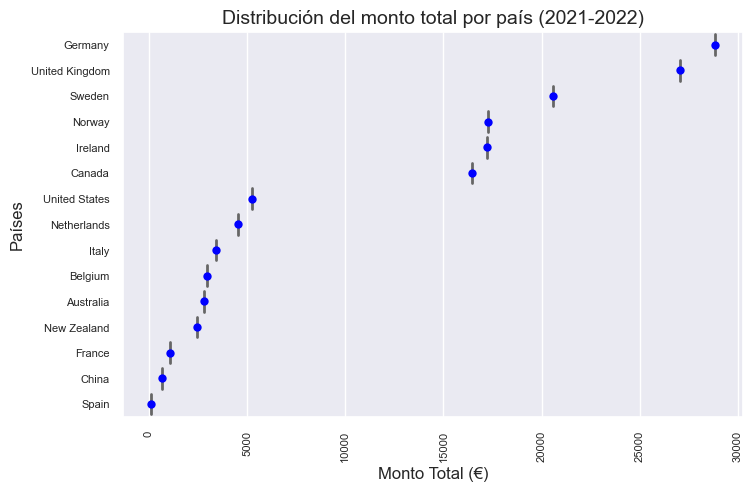

In [50]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_transactions_companies_group, x="amount", y="country",linewidth=2  
    )

sns.swarmplot(data=df_transactions_companies_group, x="amount", y="country", color="blue", size=6)


plt.title('Distribución del monto total por país (2021-2022)', fontsize=14)
plt.ylabel('Países', fontsize=12)
plt.xlabel('Monto Total (€)', fontsize=12)
plt.xticks(rotation=90)
plt.tick_params(axis='both', labelsize=8)

plt.show()

📊 Análisis del gráfico 

Este gráfico muestra la distribución de los montos totales de las transacciones por país durante el período marzo 2021 a marzo 2022. Se destacan Alemania y Reino Unido como los mercados con mayor volumen, ambos superando los 27,000 euros. Además, presentan una alta densidad de transacciones en valores elevados en comparación con otros países.

En contraste, España y China exhiben el menor desempeño, con montos totales que no superan los 685 euros. Esto es consistente con análisis previos, donde observamos que estos países registraban un bajo volumen de transacciones.

En cuanto a la dispersión, no podemos extraer conclusiones significativas, ya que el DataFrame utilizado contiene únicamente los montos totales de las transacciones por país, sin reflejar la variabilidad dentro de cada mercado.

Finalmente, el comportamiento del gráfico de swarmplot es esperable, ya que muestra un único punto por país, dado que se está analizando montos totales por país en lugar de transacciones individuales.

🔴 EJERCICIO 2: Genera un FacetGrid para visualizar múltiples aspectos de los datos simultáneamente.

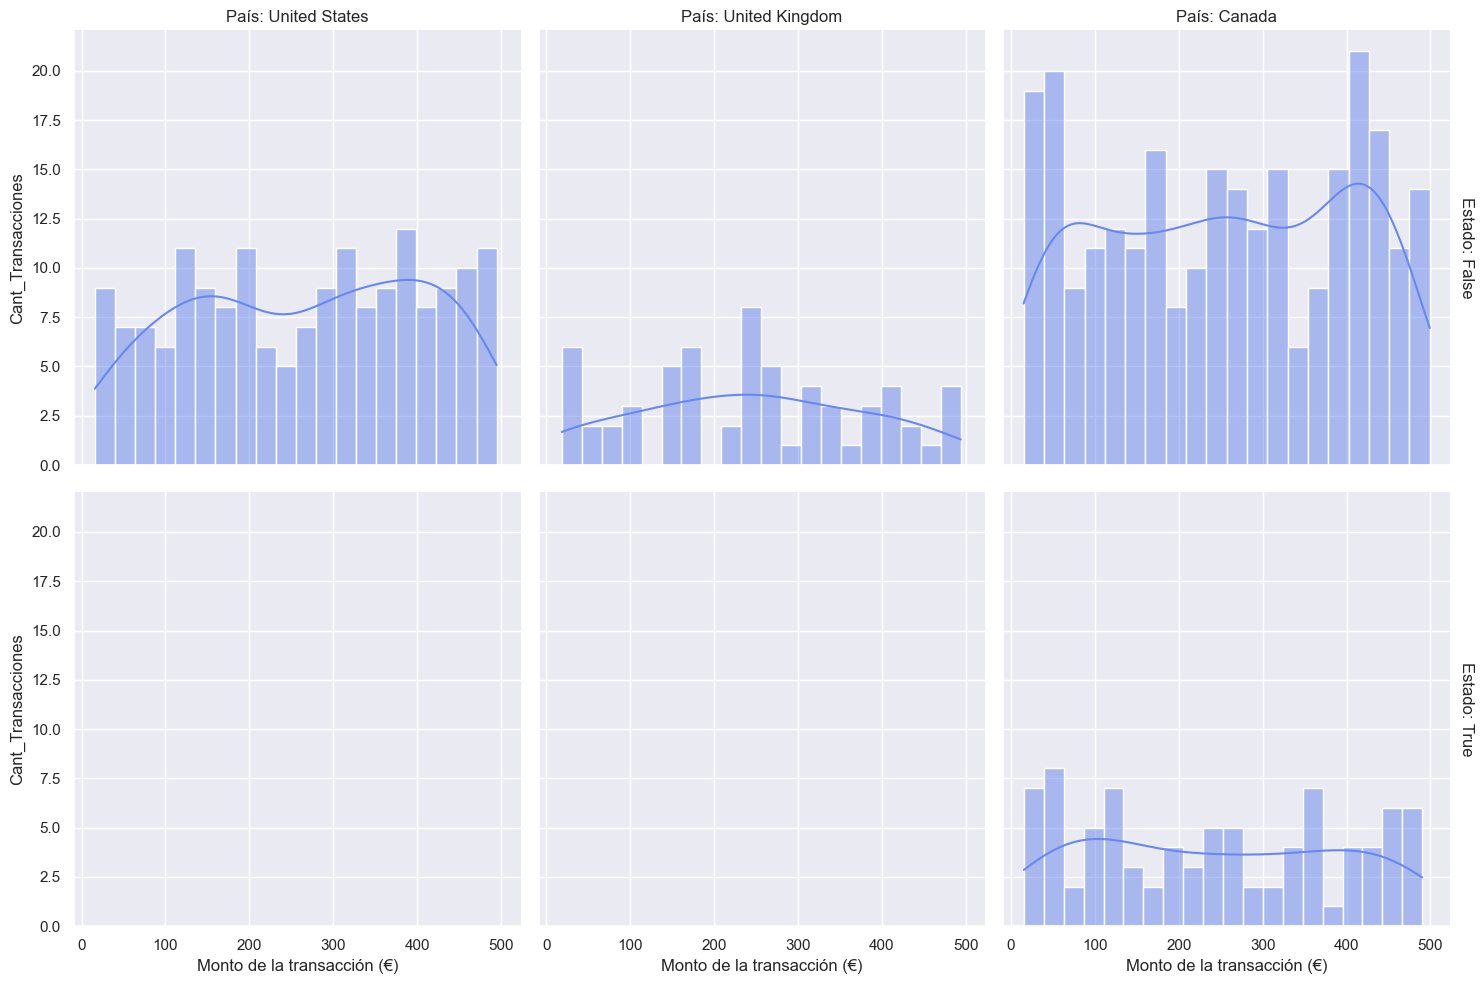

In [51]:
#Variable categorica_1=> country df_transactions_users
#Variable categorica_2=> declined df_transactions_users
#Variable numerica_3=> amount df_transactions_users


ax = sns.FacetGrid(df_transactions_users, col="country", row="declined", margin_titles=True, height=5)
ax.map(sns.histplot,'amount', bins=20, stat="count", kde=True )


ax.set_axis_labels('Monto de la transacción (€)', 'Cant_Transacciones')
ax.set_titles(col_template="País: {col_name}", row_template="Estado: {row_name}")


plt.tight_layout()
plt.show()


📊 Análisis del gráfico 

En los gráficos, podemos observar que los usuarios provienen de tres países principales: Estados Unidos, Reino Unido y Canadá. De estos, Canadá tiene la mayor cantidad de transacciones aprobadas, seguido de Estados Unidos y, en último lugar, Reino Unido. A simple vista, Canadá presenta una mayor frecuencia de transacciones en comparación con los demás países, mientras que Reino Unido tiene la menor cantidad de transacciones.

En cuanto a las transacciones rechazadas, solo Canadá presenta este tipo de transacciones, aunque su frecuencia no supera la de las transacciones aprobadas. Esto sugiere que, aunque hay ciertos rechazos, la gran mayoría de las transacciones en Canadá son aprobadas.

Además, Canadá muestra una mayor frecuencia de montos de transacciones en el rango de 400 a 500, lo que podría indicar que este mercado tiene una preferencia por productos de mayor valor. De manera similar, la frecuencia de montos de transacciones cuyo valor oscila entre 0 y 50 es más alta en Canadá, lo que sugiere que el país tiene una mayor diversidad de transacciones, tanto para productos de bajo costo como para aquellos de gama media.

Este patrón podría estar reflejando una tendencia en el comportamiento de compra en Canadá, donde los consumidores realizan transacciones más frecuentes y abarcan una gama más amplia de productos, lo que podría diferir de los hábitos de compra en Estados Unidos y Reino Unido.